# Appendix 1 - Raw data cleaning

This appendix describes the process to validate RAW data according to the [official guide](https://docs.openbci.com/docs/02Cyton/CytonDataFormat), this procces must be implemented before to the deserialization.

In [6]:
from matplotlib import pyplot as plt
import numpy as np

BIN_HEADER = 0xa0

In [7]:
data = np.loadtxt('raw', delimiter=',')
data = data.reshape(-1, 33)

(256, 33)


In [8]:
def show(data):
    plt.figure(figsize=(30, 8), dpi=90)
    plt.axis('off')
    plt.imshow(data.T)

The raw data is reshaped with `33 bytes` width.

(256, 33)


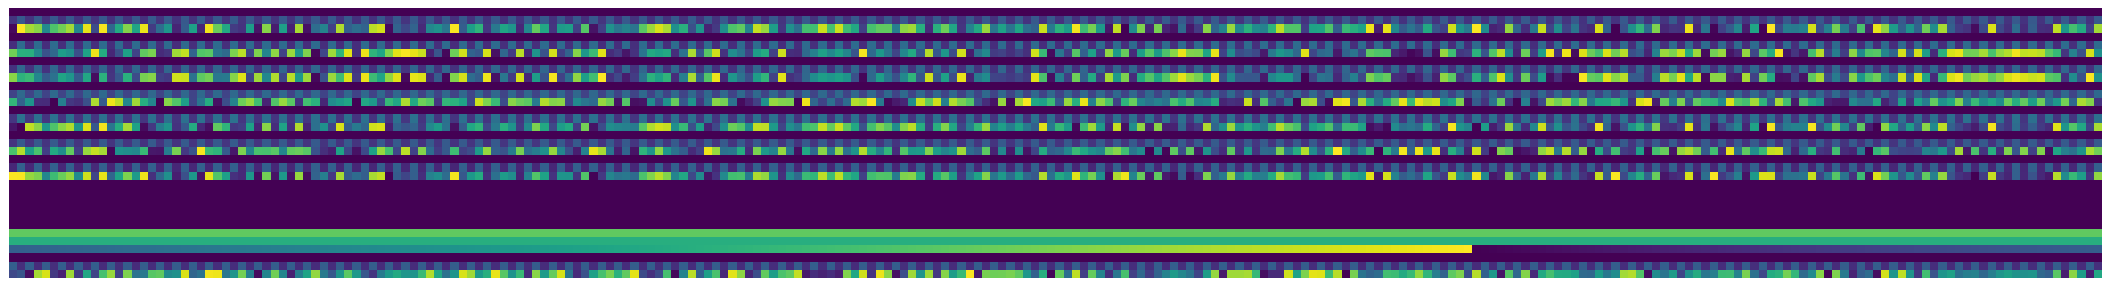

In [14]:
print(data.shape)
show(data)

The first step is align the array with the `BIN_HEADER` each `33 bytes`.

(263, 33)


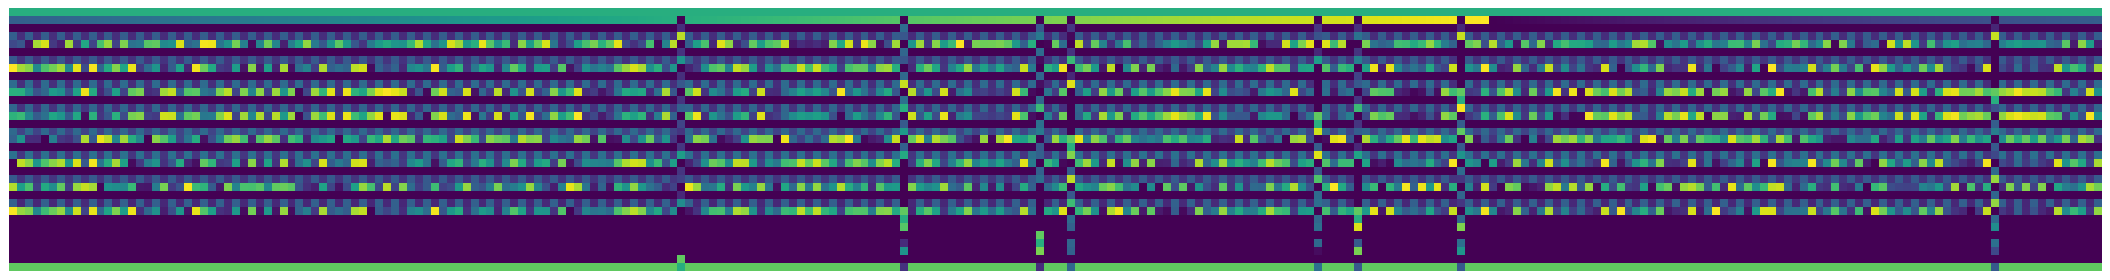

In [16]:
data_align = data.reshape(-1)
indexes = np.argwhere(data_align==BIN_HEADER).reshape(1, -1)[0]
data_align = np.array([data_align[i:i+33] for i in indexes][:-1])

print(data_align.shape)
show(data_align)

The second step is remove the samples with an invalid `FOOTER` format.

(255, 33)


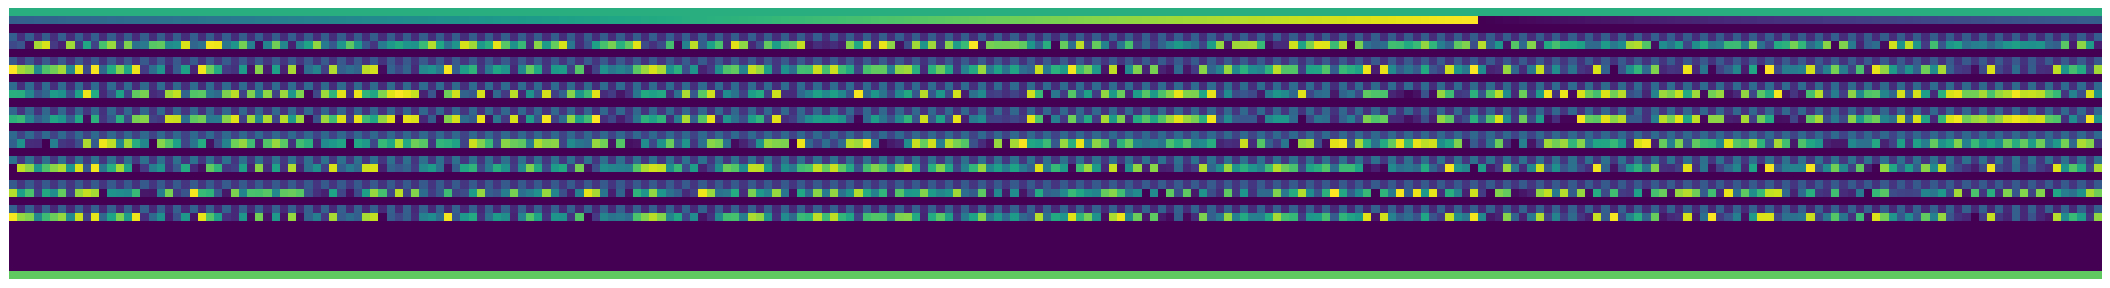

In [19]:
no_data = np.argwhere(np.array([hex(int(b))[2] for b in data_align[:, -1]]) != 'c').reshape(1, -1)[0]
data_full = np.delete(data_align, no_data, axis=0)

np.savetxt('raw.validated', data_full, delimiter=',')
print(data_full.shape)
show(data_full)